* Opencv >= 3
* numpy
* matplotlib

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

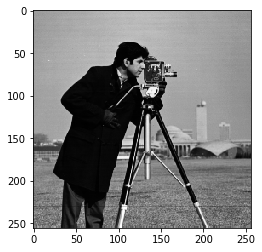

In [2]:
f = cv2.imread('images/cameraman.tif',0)
plt.imshow(f,cmap="gray")
plt.show()

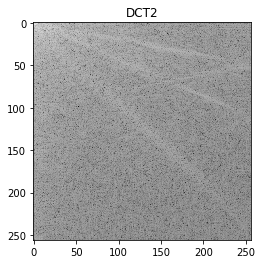

In [3]:
f=  np.array(f, dtype=np.float32)
J = cv2.dct(f)
plt.imshow(np.log(np.abs(J)), cmap="gray")
plt.title("DCT2")
plt.show()

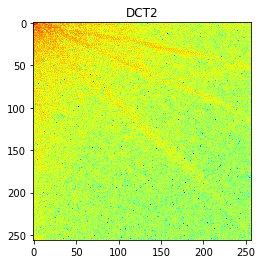

In [4]:
f=  np.array(f, dtype=np.float32)
J = cv2.dct(f)
plt.imshow(np.log(np.abs(J)),cmap="jet")
plt.title("DCT2")
plt.show()

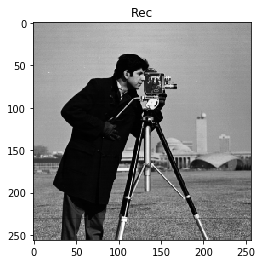

In [5]:
K = cv2.idct(J)
plt.imshow(K, cmap="gray")
plt.title("Rec")
plt.show()

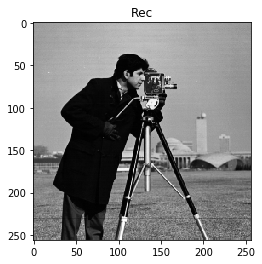

In [6]:
K = cv2.idct(J)
K = np.array(K, dtype=np.uint8)
plt.imshow(K, cmap="gray")
plt.title("Rec")
plt.show()

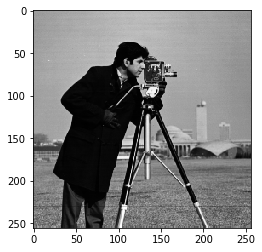

/home/hossein/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


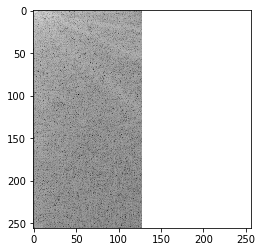

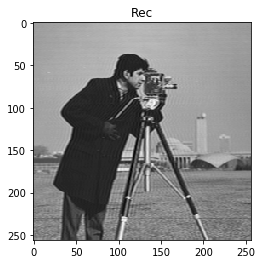

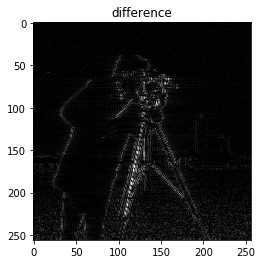

In [7]:
f = cv2.imread('images/cameraman.tif',0)
plt.imshow(f,cmap="gray")
plt.show()

f=  np.array(f, dtype=np.float32)
J = cv2.dct(f)
a= np.ones(f.shape,dtype=np.float32)
a[:, np.int(f.shape[1]/2):] = 0
J2=J*a
J2_log = np.log(np.abs(J2))
plt.imshow(J2_log,cmap="gray")
plt.show()

K = cv2.idct(J2)
plt.imshow(K, cmap="gray")
plt.title("Rec")
plt.show()

Diff = cv2.absdiff(f,K)
plt.imshow(Diff, cmap="gray")
plt.title("difference")
plt.show()

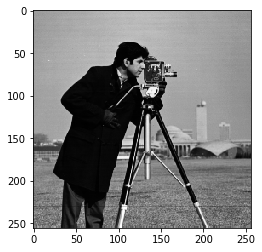

/home/hossein/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


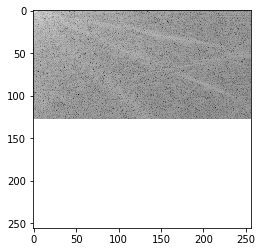

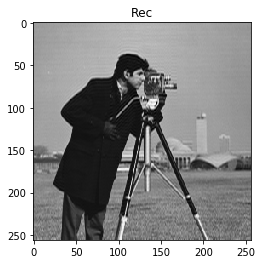

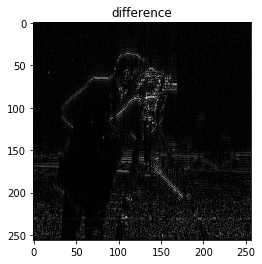

In [8]:
f = cv2.imread('images/cameraman.tif',0)
plt.imshow(f,cmap="gray")
plt.show()

f=  np.array(f, dtype=np.float32)
J = cv2.dct(f)
a= np.ones(f.shape,dtype=np.float32)
a[np.int(f.shape[0]/2):, :] = 0
J2=J*a
J2_log = np.log(np.abs(J2))
plt.imshow(J2_log,cmap="gray")
plt.show()

K = cv2.idct(J2)
plt.imshow(K, cmap="gray")
plt.title("Rec")
plt.show()

Diff = cv2.absdiff(f,K)
plt.imshow(Diff, cmap="gray")
plt.title("difference")
plt.show()

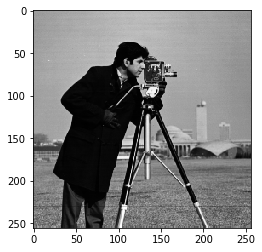

/home/hossein/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


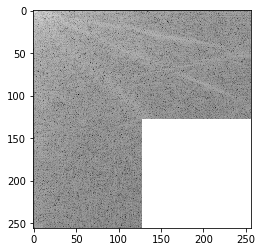

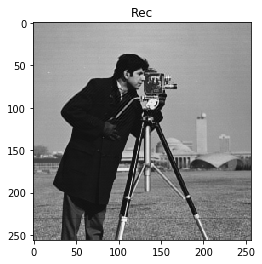

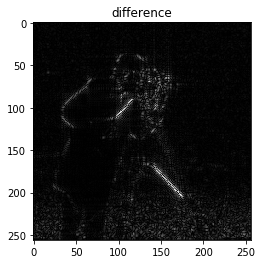

In [9]:
f = cv2.imread('images/cameraman.tif',0)
plt.imshow(f,cmap="gray")
plt.show()

f=  np.array(f, dtype=np.float32)
J = cv2.dct(f)
a= np.ones(f.shape,dtype=np.float32)
a[np.int(f.shape[0]/2):, np.int(f.shape[1]/2):] = 0
J2=J*a
J2_log = np.log(np.abs(J2))
plt.imshow(J2_log,cmap="gray")
plt.show()

K = cv2.idct(J2)
plt.imshow(K, cmap="gray")
plt.title("Rec")
plt.show()

Diff = cv2.absdiff(f,K)
plt.imshow(Diff, cmap="gray")
plt.title("difference")
plt.show()

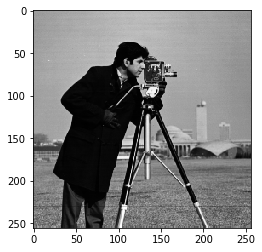

/home/hossein/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


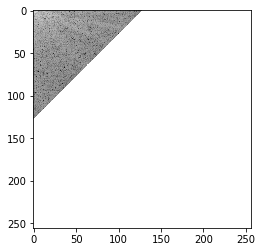

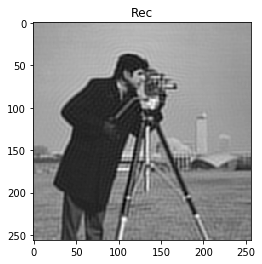

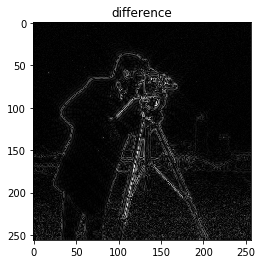

In [10]:
f = cv2.imread('images/cameraman.tif',0)
plt.imshow(f,cmap="gray")
plt.show()

f=  np.array(f, dtype=np.float32)
J = cv2.dct(f)
a= np.zeros(f.shape,dtype=np.float32)
for i in range(0,int(f.shape[1]/2)):
    for j in range(0, int(f.shape[1]/2)-i):
        a[i,j]=1

J2=J*a
J2_log = np.log(np.abs(J2))
plt.imshow(J2_log,cmap="gray")
plt.show()

K = cv2.idct(J2)
plt.imshow(K, cmap="gray")
plt.title("Rec")
plt.show()

Diff = cv2.absdiff(f,K)
plt.imshow(Diff, cmap="gray")
plt.title("difference")
plt.show()

In [26]:
from numpy.lib.stride_tricks import as_strided as ast

In [27]:
def block_view(A, block= (3, 3)):
    shape= (int(A.shape[0]/ block[0]), int(A.shape[1]/ block[1]))+ block
    strides= (block[0]* A.strides[0], block[1]* A.strides[1])+ A.strides
    return ast(A, shape= shape, strides= strides)

In [28]:
def blkproc(I,block_size,fun):
    J = np.copy(I)
    BJ = block_view(J,block_size)
    for n in range(BJ.shape[0]):
        for m in range(BJ.shape[1]):
            BJ[n,m] = fun(BJ[n,m])
    return J

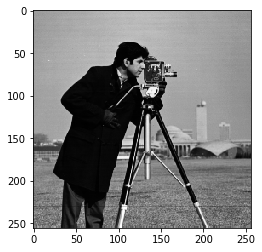

In [29]:
I = cv2.imread('images/cameraman.tif',0)
plt.imshow(I,cmap="gray")
plt.show()

/home/hossein/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


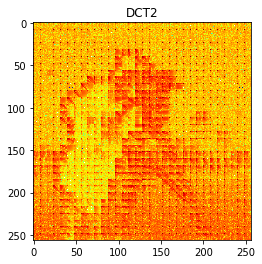

In [30]:
size = 8
FI=  np.array(I, dtype=np.float32)
J = blkproc(FI,(size,size),cv2.dct)
plt.imshow(np.log(np.abs(J)), cmap="jet")
plt.title("DCT2")
plt.show()

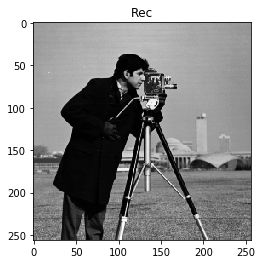

In [31]:
R = blkproc(J,(size,size),cv2.idct)
plt.imshow(R, cmap="gray")
plt.title("Rec")
plt.show()

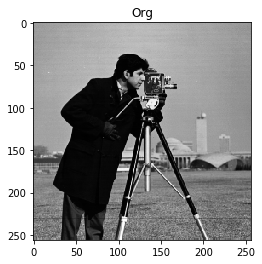

/home/hossein/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


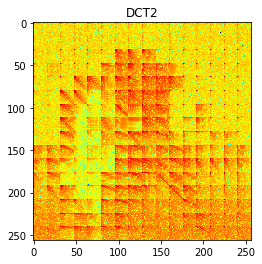

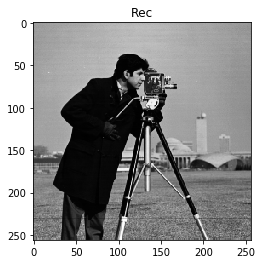

In [32]:
I = cv2.imread('images/cameraman.tif',0)
plt.imshow(I,cmap="gray")
plt.title("Org")
plt.show()
size = 16
FI=  np.array(I, dtype=np.float32)
J = blkproc(FI,(size,size),cv2.dct)
plt.imshow(np.log(np.abs(J)), cmap="jet")
plt.title("DCT2")
plt.show()
R = blkproc(J,(size,size),cv2.idct)
plt.imshow(R, cmap="gray")
plt.title("Rec")
plt.show()

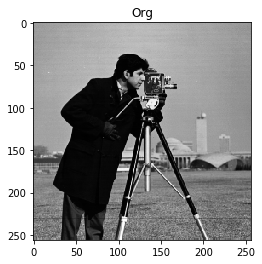

/home/hossein/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


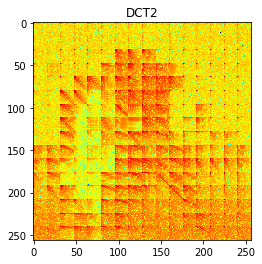

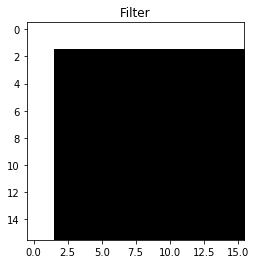

/home/hossein/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


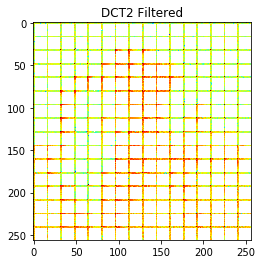

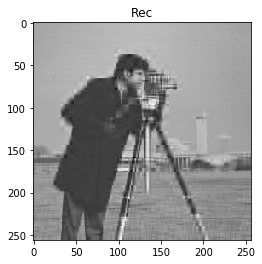

In [33]:
I = cv2.imread('images/cameraman.tif',0)
plt.imshow(I,cmap="gray")
plt.title("Org")
plt.show()

size = 16
FI=  np.array(I, dtype=np.float32)
J = blkproc(FI,(size,size),cv2.dct)
plt.imshow(np.log(np.abs(J)), cmap="jet")
plt.title("DCT2")
plt.show()

a= np.ones((size,size),dtype=np.float32)
a[2:,2:]=0
plt.imshow(a,cmap="gray")
plt.title("Filter")
plt.show()

fun = lambda x:x*a
J2 = blkproc(J,(size,size),fun)
plt.imshow(np.log(np.abs(J2)), cmap="jet")
plt.title("DCT2 Filtered")
plt.show()

R = blkproc(J2,(size,size),cv2.idct)
plt.imshow(R, cmap="gray")
plt.title("Rec")
plt.show()

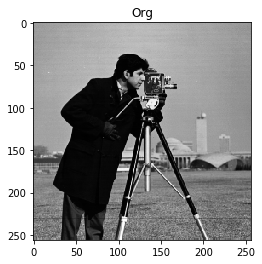

/home/hossein/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


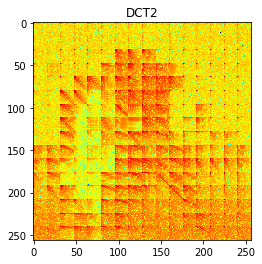

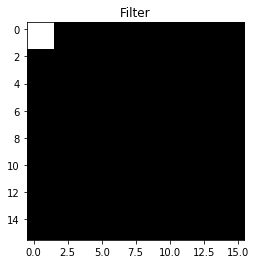

/home/hossein/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


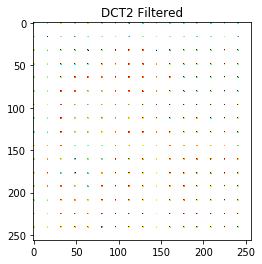

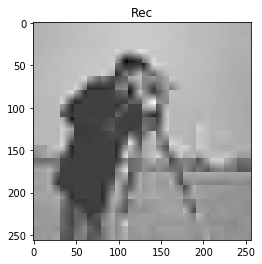

In [34]:
I = cv2.imread('images/cameraman.tif',0)
plt.imshow(I,cmap="gray")
plt.title("Org")
plt.show()

size = 16
FI=  np.array(I, dtype=np.float32)
J = blkproc(FI,(size,size),cv2.dct)
plt.imshow(np.log(np.abs(J)), cmap="jet")
plt.title("DCT2")
plt.show()

a= np.zeros((size,size),dtype=np.float32)
a[0:2,0:2]=1
plt.imshow(a,cmap="gray")
plt.title("Filter")
plt.show()

fun = lambda x:x*a
J2 = blkproc(J,(size,size),fun)
plt.imshow(np.log(np.abs(J2)), cmap="jet")
plt.title("DCT2 Filtered")
plt.show()

R = blkproc(J2,(size,size),cv2.idct)
plt.imshow(R, cmap="gray")
plt.title("Rec")
plt.show()